# Metadata exploration

## Imports

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

import datetime

import geopandas as gpd
from shapely.geometry import Point

In [2]:
!pwd

/Users/Charlotte/code/charlottesuaud/birds/notebooks


## Data

In [3]:
def get_data(path):
    return pd.read_csv(path)

In [4]:
metadata_path = "../raw_data/metadata.csv"

metadata = get_data(metadata_path)

metadata.head(3)

,Recording_ID,Genus,Specific_epithet,Subspecies,English_name,Recordist,Country,Locality,Latitude,Longitude,Vocalization_type,Audio_file,License,Url,Quality,Time,Date,Altitude,file.name,Spectrogram_small,Spectrogram_med,Spectrogram_large,Spectrogram_full,Length,Uploaded,Other_species,Remarks,Bird_seen,Playback_used,Other_species1,Other_species2,Other_species3,Other_species4,Other_species5,Other_species6,Other_species7,Other_species8,Other_species9,Other_species10,Other_species11,Other_species12,Other_species13,Other_species14,Other_species15,Other_species16,Other_species17,Other_species18,Other_species19,Other_species20,Other_species21,Other_species22,Other_species23,Other_species24,Other_species25,Other_species26,Other_species27,Other_species28,Other_species29,Other_species30,Species,Path
0,356824,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"doñana visitable, sevilla, andalucía",37.1058,-6.2577,"call, female, flight call, male, song",//www.xeno-canto.org/356824/download,//creativecommons.org/licenses/by-nc-sa/4.0/,//www.xeno-canto.org/356824,no score,?,2017-01-28,?,XC356824-songscape 2-16 entremuros 28-01-2017.mp3,//www.xeno-canto.org/sounds/uploaded/DXYUSANLS...,//www.xeno-canto.org/sounds/uploaded/DXYUSANLS...,//www.xeno-canto.org/sounds/uploaded/DXYUSANLS...,//www.xeno-canto.org/sounds/uploaded/DXYUSANLS...,14:31,2017-02-25,NaN,parte 16 de 37. Paisaje sonoro grabado en la ú...,no,no,Tyto alba,Himantopus himantopus,Gallinula chloropus,Fulica atra,Porphyrio porphyrio,Tachybaptus ruficollis,Anser anser,Grus grus,Alcedo atthis,Anthus pratensis,Sturnus unicolor,Motacilla alba,Emberiza calandra,Emberiza schoeniclus,Serinus serinus,Chloris chloris,Carduelis carduelis,Galerida cristata,Melanocorypha calandra,Passer hispaniolensis,Corvus corax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-356824.mp3
1,317951,Sonus,naturalis,NaN,Soundscape,José Carlos Sires,Spain,"arroyo algarbe, hinojos, huelva, andalucía",37.3006,-6.3783,"begging call, call, female, flight call, juven...",//www.xeno-canto.org/317951/download,//creativecommons.org/licenses/by-nc-sa/4.0/,//www.xeno-canto.org/317951,B,?,2016-05-16,?,XC317951-songscape 4-7 arroyo los centinales 1...,//www.xeno-canto.org/sounds/uploaded/DXYUSANLS...,//www.xeno-canto.org/sounds/uploaded/DXYUSANLS...,//www.xeno-canto.org/sounds/uploaded/DXYUSANLS...,//www.xeno-canto.org/sounds/uploaded/DXYUSANLS...,10:52,2016-05-23,NaN,Parte 7 de 7. Songscape grabado en un pinar ce...,yes,no,Cyanistes caeruleus,Lophophanes cristatus,Parus major,Fringilla coelebs,Chloris chloris,Serinus serinus,Certhia brachydactyla,Sturnus unicolor,Cyanopica cooki,Sylvia atricapilla,Sylvia melanocephala,Troglodytes troglodytes,Cettia cetti,Luscinia megarhynchos,Passer domesticus,Petronia petronia,Turdus merula,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-317951.mp3
2,508571,Sonus,naturalis,NaN,Soundscape,Nelson Conceição,Portugal,"Santo Estêvão, Tavira, Faro",37.1554,-7.6960,"adult, alarm call, call, female, flight call, ...",//www.xeno-canto.org/508571/download,//creativecommons.org/licenses/by-nc-sa/4.0/,//www.xeno-canto.org/508571,B,17:00,2019-11-18,10,XC508571-191118-170029soundscape.mp3,//www.xeno-canto.org/sounds/uploaded/JYPQCEFKA...,//www.xeno-canto.org/sounds/uploaded/JYPQCEFKA...,//www.xeno-canto.org/sounds/uploaded/JYPQCEFKA...,//www.xeno-canto.org/sounds/uploaded/JYPQCEFKA...,2:08,2019-11-27,NaN,Recorder: Zoom H1n.\n\nWindscreen: Zoom WSU-1\...,yes,no,Sturnus unicolor,Cyanopica cooki,Linaria cannabina,Erithacus rubecula,Turdus philomelos,Garrulus glandarius,Phoenicurus ochruros,Motacilla cinerea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sonus naturalis,mp3//Sonus-naturalis-508571.mp3


In [5]:
metadata.shape

(2150, 61)

## Names

In [6]:
def get_clean_path(mp3_path):
    return mp3_path.split(sep="mp3//")[-1]

In [7]:
metadata[metadata['Genus'] + ' ' + metadata['Specific_epithet'] != metadata['Species']]

,Recording_ID,Genus,Specific_epithet,Subspecies,English_name,Recordist,Country,Locality,Latitude,Longitude,Vocalization_type,Audio_file,License,Url,Quality,Time,Date,Altitude,file.name,Spectrogram_small,Spectrogram_med,Spectrogram_large,Spectrogram_full,Length,Uploaded,Other_species,Remarks,Bird_seen,Playback_used,Other_species1,Other_species2,Other_species3,Other_species4,Other_species5,Other_species6,Other_species7,Other_species8,Other_species9,Other_species10,Other_species11,Other_species12,Other_species13,Other_species14,Other_species15,Other_species16,Other_species17,Other_species18,Other_species19,Other_species20,Other_species21,Other_species22,Other_species23,Other_species24,Other_species25,Other_species26,Other_species27,Other_species28,Other_species29,Other_species30,Species,Path


In [8]:
target_species = list(metadata['Species'].unique())

target_names = list(metadata['English_name'].unique())

In [9]:
metadata[metadata['Subspecies'].notna()].shape

(249, 61)

In [10]:
metadata[metadata['Subspecies'] == metadata['Specific_epithet']].shape

(149, 61)

-> 249 / 2150 `Subspecies` are specified, and only 249 - 149 = 100 are different from `Specific epithet`

In [11]:
def get_names_df(metadata):
    names_df = metadata.copy()[['Recording_ID', 'Species', 'Path', 'English_name']]
    names_df['Path'] = names_df['Path'].apply(get_clean_path)
    return names_df

In [12]:
names_df = get_names_df(metadata)
names_df.head(3)

,Recording_ID,Species,Path,English_name
0,356824,Sonus naturalis,Sonus-naturalis-356824.mp3,Soundscape
1,317951,Sonus naturalis,Sonus-naturalis-317951.mp3,Soundscape
2,508571,Sonus naturalis,Sonus-naturalis-508571.mp3,Soundscape


## Durations

In [13]:
def to_seconds(string):
    t = datetime.datetime.strptime(string, "%M:%S")
    return t.minute * 60 + t.second

In [14]:
def get_durations_df(metadata):
    durations_df = metadata.copy()[['Recording_ID', 'Species', 'Path', 'English_name', 'Length']]
    durations_df['Path'] = durations_df['Path'].apply(get_clean_path)
    durations_df['Length'] = durations_df['Length'].apply(to_seconds)
    return durations_df

In [15]:
durations_df = get_durations_df(metadata)

durations_df.head(3)

,Recording_ID,Species,Path,English_name,Length
0,356824,Sonus naturalis,Sonus-naturalis-356824.mp3,Soundscape,871
1,317951,Sonus naturalis,Sonus-naturalis-317951.mp3,Soundscape,652
2,508571,Sonus naturalis,Sonus-naturalis-508571.mp3,Soundscape,128


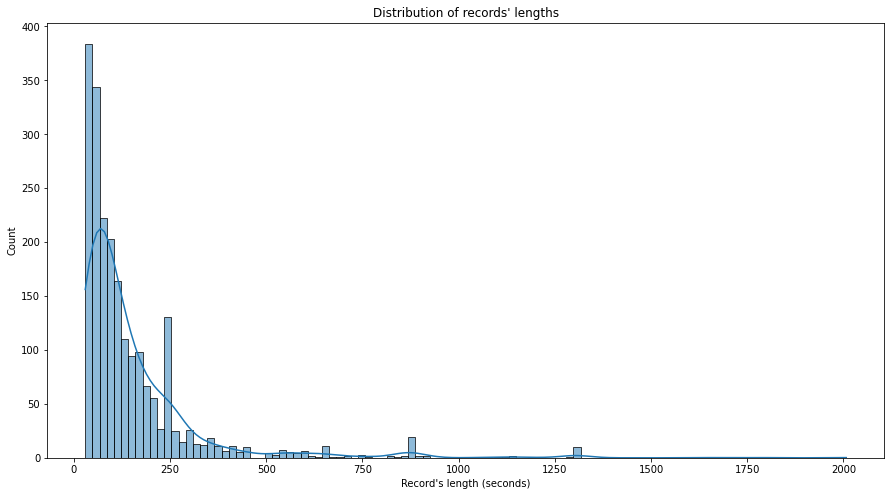

In [16]:
plt.figure(figsize=(15, 8))
sns.histplot(durations_df['Length'], kde=True)
plt.xlabel("Record's length (seconds)")
plt.title("Distribution of records' lengths");

## Locations

In [17]:
def get_locations_df(metadata):
    locations_df = metadata.copy()[['Recording_ID', 'Species', 'Path', 'English_name', 'Country', 'Latitude', 'Longitude']]
    locations_df['Path'] = locations_df['Path'].apply(get_clean_path)
    return locations_df

In [18]:
locations_df = get_locations_df(metadata)

locations_df.head(3)

,Recording_ID,Species,Path,English_name,Country,Latitude,Longitude
0,356824,Sonus naturalis,Sonus-naturalis-356824.mp3,Soundscape,Spain,37.1058,-6.2577
1,317951,Sonus naturalis,Sonus-naturalis-317951.mp3,Soundscape,Spain,37.3006,-6.3783
2,508571,Sonus naturalis,Sonus-naturalis-508571.mp3,Soundscape,Portugal,37.1554,-7.6960


In [40]:
lat_lon = {
    'latitude': (locations_df['Latitude'].min() - 5, locations_df['Latitude'].max() + 5),
    'longitude': (locations_df['Longitude'].min() - 5, locations_df['Longitude'].max() + 5)
}
lat_lon

{'latitude': (23.3581, 75.0836), 'longitude': (-21.5017, 64.6352)}

In [44]:
def print_species(species_list):

    # Get map
    world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Create geometry
    geometry = [Point(xy) for xy in zip(locations_df["Longitude"], locations_df["Latitude"])]

    # Geo Dataframe
    geo_df = gpd.GeoDataFrame(locations_df, geometry=geometry)

    # Plot
    fig, ax = plt.subplots(figsize = (15, 10))
    world_map.plot(ax=ax, alpha=0.4, color="grey")

    palette = iter(sns.hls_palette(len(target_species)))

    for specie in species_list:
        geo_df[geo_df['Species'] == specie].plot(ax=ax,color=next(palette), label=specie, alpha=0.6)

    ax.set_xlim(lat_lon['longitude'])
    ax.set_ylim(lat_lon['latitude']);

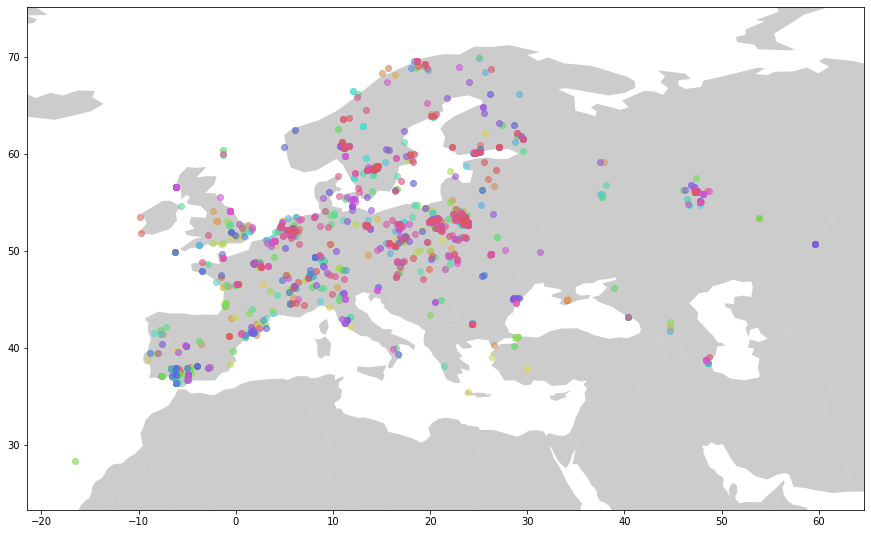

In [46]:
print_species(target_species)

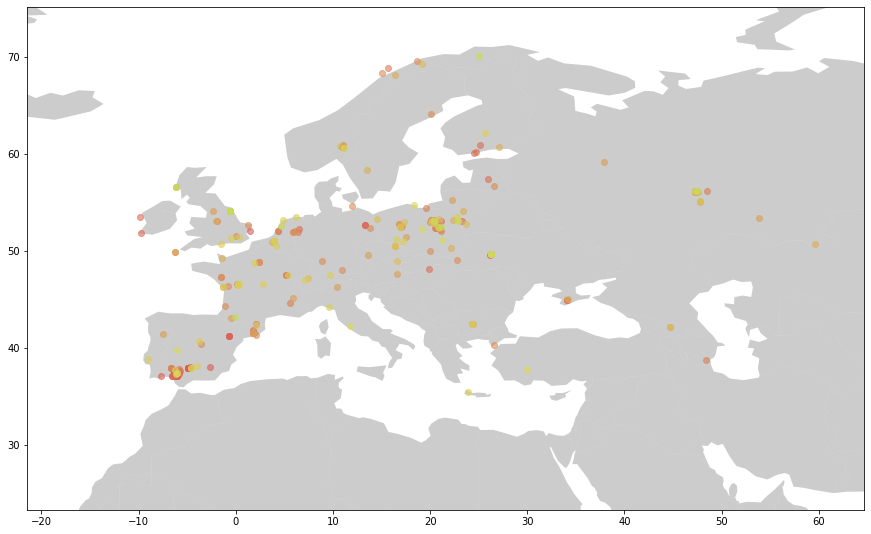

In [45]:
print_species(target_species[0:10])

## Times of recording

In [23]:
def clean_date(date):
    new_date = date.replace('-00', '-01')
    return new_date

In [24]:
def clean_time(time):
    new_time = time.replace('--', ':').replace('-', ':')
    return new_time

In [25]:
def get_times_df(metadata):
    
    # getting interesting features
    times_df = metadata.copy()[['Recording_ID', 'Species', 'Path', 'Time', 'Date']]
    times_df['Path'] = times_df['Path'].apply(get_clean_path)
    
    # cleaning date and getting month
    times_df['Date'] = times_df['Date'].apply(clean_date)
    times_df['Date'] = pd.to_datetime(times_df['Date'], errors='coerce').dt.date
    times_df['Month'] = times_df['Date'].apply(lambda x: x.month)
    
    # cleaning time
    times_df['Time'] = times_df['Time'].apply(clean_time)
    times_df['Time'] = pd.to_datetime(times_df['Time'], errors='coerce').dt.time
    
    return times_df

In [26]:
times_df = get_times_df(metadata)

times_df.head(5)

,Recording_ID,Species,Path,Time,Date,Month
0,356824,Sonus naturalis,Sonus-naturalis-356824.mp3,NaT,2017-01-28,1.0
1,317951,Sonus naturalis,Sonus-naturalis-317951.mp3,NaT,2016-05-16,5.0
2,508571,Sonus naturalis,Sonus-naturalis-508571.mp3,17:00:00,2019-11-18,11.0
3,448534,Sonus naturalis,Sonus-naturalis-448534.mp3,NaT,2018-02-22,2.0
4,373414,Sonus naturalis,Sonus-naturalis-373414.mp3,04:28:00,2017-05-20,5.0


In [27]:
times_df['Time'].isna().sum()

222

In [28]:
times_df.dtypes

Recording_ID      int64
Species          object
Path             object
Time             object
Date             object
Month           float64
dtype: object

In [29]:
print(type(times_df.loc[0, 'Date']))
print(type(times_df.loc[2, 'Time']))

<class 'datetime.date'>
<class 'datetime.time'>


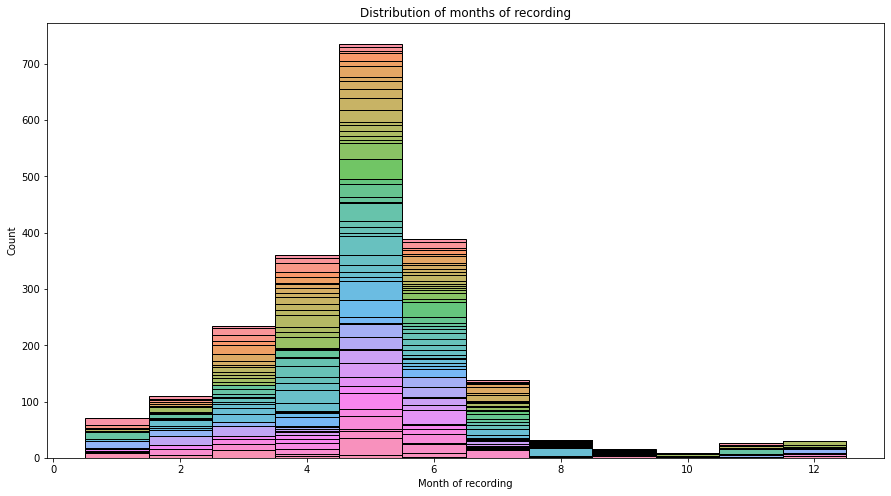

In [30]:
plt.figure(figsize=(15, 8))
sns.histplot(data=times_df, x='Month', hue='Species', multiple='stack', discrete=True)
ax=plt.gca()
plt.xlabel("Month of recording")
plt.title("Distribution of months of recording")
ax.get_legend().remove();

## Other species

In [31]:
other_species_col = ['Other_species']

for i in range(1,31):
    other_species_col.append('Other_species' + str(i))

In [32]:
def get_all_species(row):
    species = [row[col] for col in other_species_col]
    
    unique_species = []
    
    for specie in species :
        if specie not in unique_species:
            if specie != row['Species']:
                unique_species.append(specie)
    
    unique_species.remove('')
    
    return unique_species

In [33]:
def get_target_species(species_list):
    
    return [specie for specie in species_list if specie in target_species]

In [36]:
def get_other_species_df(metadata):
    
    # getting interesting features
    other_species_df = metadata.copy()[['Recording_ID', 'Species', 'Path'] + other_species_col]
    other_species_df['Path'] = other_species_df['Path'].apply(get_clean_path)
    other_species_df.replace(np.nan, '', inplace=True)
    
    # getting list of all species
    other_species_df['all_other_species'] = other_species_df.apply(get_all_species, axis=1)

    # getting list of species that are known in 'Species' column
    other_species_df['target_other_species'] = other_species_df['all_other_species'].apply(get_target_species)
    
    # droping 'other_speciesx' columns
    other_species_df.drop(columns=other_species_col, inplace=True)
    
    # getting other species counts
    other_species_df['all_other_species_num'] = other_species_df['all_other_species'].apply(lambda x: len(x))
    other_species_df['target_other_species_num'] = other_species_df['target_other_species'].apply(lambda x: len(x))
    
    # getting jittered counts (for plotting)
    
    x = np.random.normal(0, .3, size=other_species_df.shape[0])
    y = np.random.normal(0, .3, size=other_species_df.shape[0])
    
    other_species_df['jitt_all_other_species_num'] = other_species_df['all_other_species_num'] + y
    other_species_df['jitt_target_other_species_num'] = other_species_df['target_other_species_num'] + x
    
    return other_species_df

In [37]:
other_species_df = get_other_species_df(metadata)

other_species_df.head(3)

,Recording_ID,Species,Path,all_other_species,target_other_species,all_other_species_num,target_other_species_num,jitt_all_other_species_num,jitt_target_other_species_num
0,356824,Sonus naturalis,Sonus-naturalis-356824.mp3,"[Tyto alba, Himantopus himantopus, Gallinula c...","[Emberiza calandra, Emberiza schoeniclus, Chlo...",21,4,21.257594,4.292905
1,317951,Sonus naturalis,Sonus-naturalis-317951.mp3,"[Cyanistes caeruleus, Lophophanes cristatus, P...","[Cyanistes caeruleus, Parus major, Fringilla c...",17,8,17.121325,8.240545
2,508571,Sonus naturalis,Sonus-naturalis-508571.mp3,"[Sturnus unicolor, Cyanopica cooki, Linaria ca...","[Linaria cannabina, Erithacus rubecula, Turdus...",8,3,8.043151,3.150220


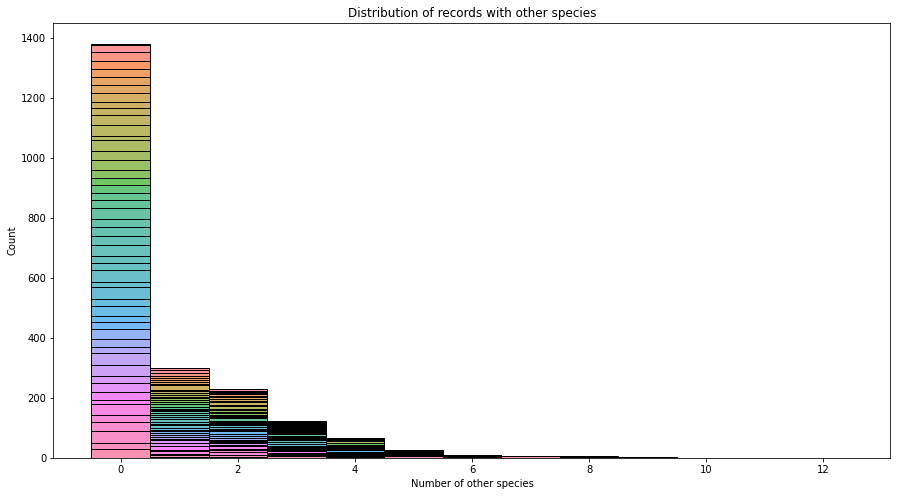

In [38]:
plt.figure(figsize=(15, 8))
sns.histplot(data=other_species_df, x='target_other_species_num', hue='Species', multiple='stack', discrete=True)
ax = plt.gca()
plt.xlabel('Number of other species')
plt.title('Distribution of records with other species')
ax.get_legend().remove();

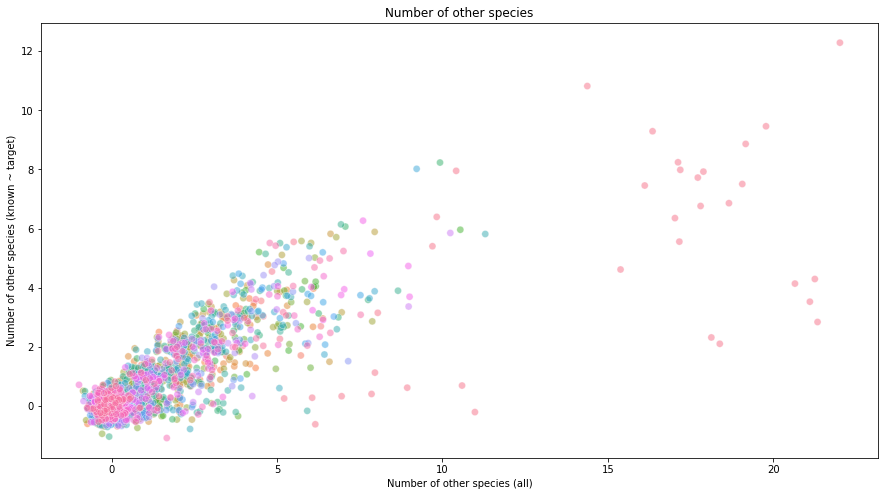

In [39]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=other_species_df, 
                x='jitt_all_other_species_num', 
                y='jitt_target_other_species_num',
                hue='Species',
                alpha=.5,
                s=50
)
ax = plt.gca()
plt.xlabel('Number of other species (all)')
plt.ylabel('Number of other species (known ~ target)')
plt.title('Number of other species')
ax.get_legend().remove();